### Name:Poushik Yelne
### Roll No.51
### Practical No.6

In [ ]:
import pandas as pd
df = pd.read_csv('play_tennis.csv')

print(df)

    day   outlook  temp humidity    wind play
0    D1    Sunny    Hot     high    Weak   No
1    D2    Sunny    Hot     high  Strong   No
2    D3  Overcast   Hot     high    Weak  Yes
3    D4      Rain  Mild     high    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8    Sunny   Mild     High    Weak   No
8    D9    Sunny   Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11    Sunny   Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [ ]:
import pandas as pd
import numpy as np

def entropy(y):
    unique_values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    return entropy_value

target_entropy = entropy(df['play'])

print("Entropy of the target variable 'play':", target_entropy)

Entropy of the target variable 'play': 0.9402859586706311


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('play_tennis.csv')

# Define a function to calculate entropy
def entropy(y):
    unique_values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    return entropy_value

# Calculate entropy for each attribute
attribute_entropies = {}
for column in df.columns:
    if column != 'play':  # Exclude the target variable
        attribute_entropies[column] = entropy(df[column])

# Print the entropy of each attribute
print("Entropy of each attribute:")
for attribute, entropy_value in attribute_entropies.items():
    print(f"{attribute}: {entropy_value}")


Entropy of each attribute:
day: 3.8073549220576055
outlook: 1.5774062828523454
temp: 1.5566567074628228
humidity: 1.4926140680171258
wind: 0.9852281360342515


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('play_tennis.csv')

# Replace 'D1', 'D2', etc. with other attributes
df['day'] = df['day'].replace({'D1': 'Day1', 'D2': 'Day2', 'D3': 'Day3', 'D4': 'Day4', 'D5': 'Day5',
                               'D6': 'Day6', 'D7': 'Day7', 'D8': 'Day8', 'D9': 'Day9', 'D10': 'Day10',
                               'D11': 'Day11', 'D12': 'Day12', 'D13': 'Day13', 'D14': 'Day14'})

# Define a function to calculate entropy
def entropy(y):
    unique_values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    return entropy_value

# Calculate entropy for each attribute
attribute_entropies = {}
for column in df.columns:
    if column != 'play' and column != 'day':  # Exclude the target variable and 'day' column
        attribute_entropies[column] = entropy(df[column])

# Define a function to select the best attribute based on information gain
def select_best_attribute(X, y, attributes):
    gains = {attribute: entropy(y) for attribute in attributes}
    for attribute in attributes:
        unique_values, counts = np.unique(X[attribute], return_counts=True)
        for value, count in zip(unique_values, counts):
            gain = entropy(y[X[attribute] == value])
            gains[attribute] -= (count / len(X)) * gain
    return max(gains, key=gains.get)

# Define a function to build the decision tree recursively
def build_decision_tree(X, y, attributes):
    if len(set(y)) == 1:
        return y.iloc[0]
    if len(attributes) == 0:
        return y.value_counts().idxmax()

    best_attribute = select_best_attribute(X, y, attributes)
    tree = {best_attribute: {}}
    for value in X[best_attribute].unique():
        subset_X = X[X[best_attribute] == value].drop(columns=best_attribute)
        subset_y = y[X[best_attribute] == value]
        if subset_X.empty:
            tree[best_attribute][value] = subset_y.value_counts().idxmax()
        else:
            remaining_attributes = attributes.copy()
            remaining_attributes.remove(best_attribute)
            tree[best_attribute][value] = build_decision_tree(subset_X, subset_y, remaining_attributes)
    return tree

# Construct the decision tree
attributes = list(attribute_entropies.keys())
decision_tree = build_decision_tree(df.drop(columns=['play', 'day']), df['play'], attributes)

# Define a function to print the decision tree
def print_decision_tree(tree, depth=0, indent='  '):
    if isinstance(tree, dict):
        for attribute, subtree in tree.items():
            print(indent * depth, f"If {attribute}:")
            for value, subsubtree in subtree.items():
                print(indent * (depth + 1), f"Then {value}:")
                print_decision_tree(subsubtree, depth + 2, indent)
    else:
        print(indent * (depth + 1), 'Predict:', tree)

print_decision_tree(decision_tree)



 If outlook:
   Then Sunny :
     If humidity:
       Then high:
           Predict: No
       Then High:
           Predict: No
       Then Normal:
           Predict: Yes
   Then Overcast:
       Predict: Yes
   Then Rain:
     If wind:
       Then Weak:
           Predict: Yes
       Then Strong:
           Predict: No


Accuracy: 0.3333333333333333


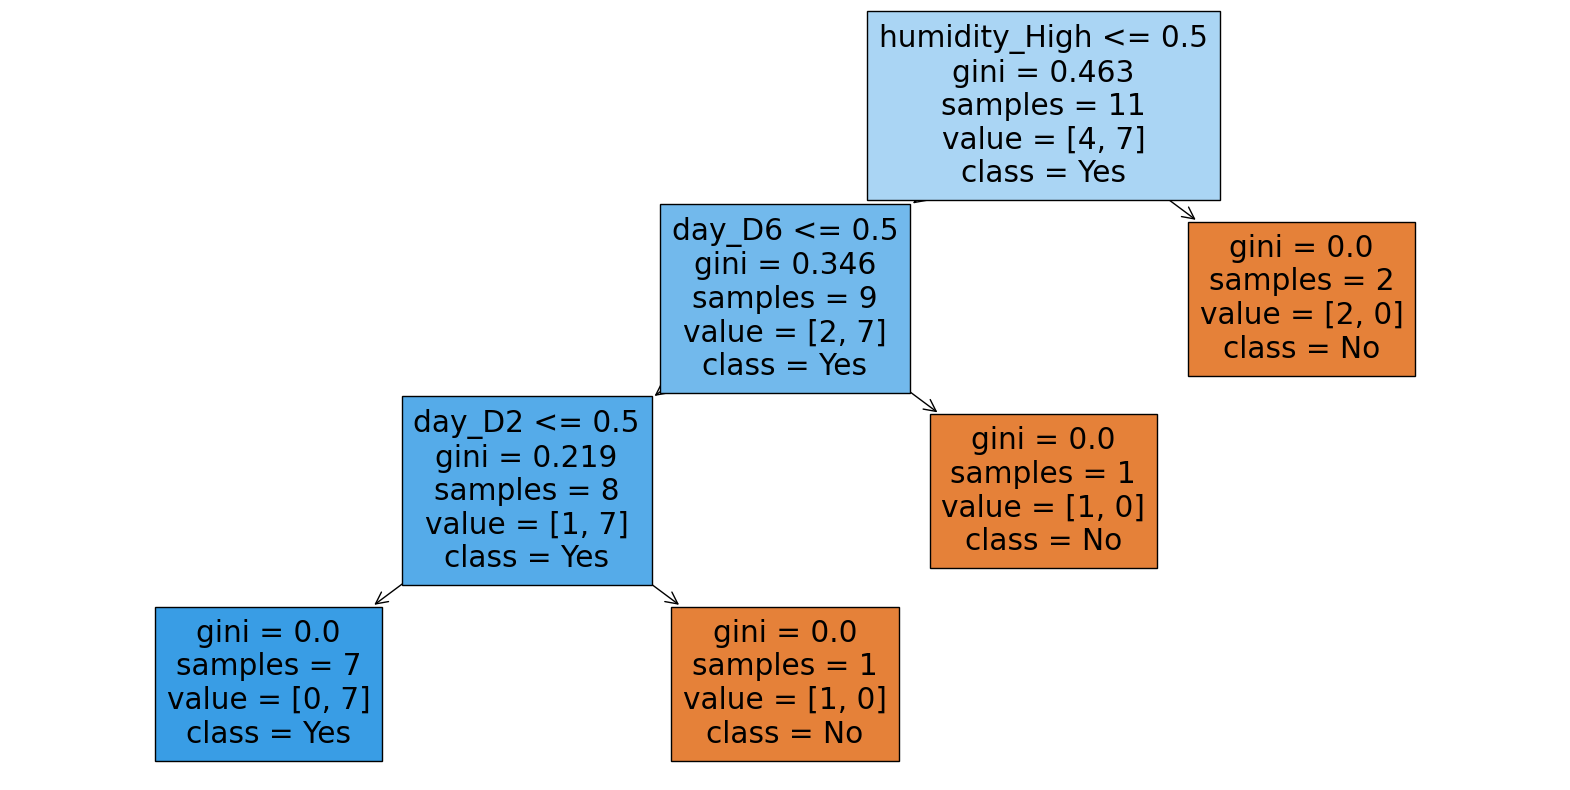

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('play_tennis.csv')


df = pd.get_dummies(df)


X = df.drop(columns=['play_No', 'play_Yes'])
y = df['play_Yes']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
